**MUSIC GENRE CLASSIFICATION**
   
Authors: Aayush Sagar, Naveen US, Hari Varsha V    
Objective: To find optimal K value     
Input: Dataset     
Output: Accuracy

In [ ]:
import pandas as pd #data analysis toolkit
import matplotlib.pyplot as plt #for plotting graphs
import numpy as np #for high level computations
%matplotlib inline

In [ ]:
from sklearn.preprocessing import StandardScaler #standardisation of values
from sklearn.preprocessing import MinMaxScaler #normalization of values
from sklearn.model_selection import train_test_split #to split data
from sklearn.neighbors import KNeighborsClassifier #KNN classifier
from sklearn.metrics import confusion_matrix,accuracy_score #to get confusion matrix and accuracy
from sklearn.model_selection import cross_val_score #to perform evaluation and cross_validation

In [ ]:
data_set = pd.read_csv("music_samples.csv") #data_set input

In [ ]:
data_set = data_set.drop('filename', axis = 1) #dropping of columns as mentioned
data_set = data_set.fillna(data_set.mean()) #mean for missing data

In [ ]:
data_set = np.round(data_set, decimals = 2) #rounding all values in dataset to 2 decimal places
data_set.head() #first 5 values in dataset

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,66149,0.34,0.09,0.13,0.0,1773.07,167541.63,1972.74,117335.77,3714.56,...,39.69,-3.24,36.49,0.72,38.10,-5.05,33.62,-0.24,43.77,0
1,66149,0.34,0.09,0.11,0.0,1816.69,90525.69,2010.05,65671.88,3869.68,...,64.75,-6.06,40.68,0.16,51.26,-2.84,97.03,5.78,59.94,0
2,66149,0.35,0.09,0.13,0.0,1788.54,111407.44,2084.57,75124.92,3997.64,...,67.34,-1.77,28.35,2.38,45.72,-1.94,53.05,2.52,33.11,0
3,66149,0.36,0.09,0.13,0.0,1655.29,111952.28,1960.04,82913.64,3568.30,...,47.74,-3.84,28.34,1.22,34.77,-3.58,50.84,3.63,32.02,0
4,66149,0.34,0.09,0.14,0.0,1630.66,79667.27,1948.50,60204.02,3469.99,...,30.34,0.66,45.88,1.69,51.36,-3.39,26.74,0.54,29.15,0


In [ ]:
dset_modified = data_set.drop('label',axis = 1) #dataset without label feature

In [ ]:
dset_modified.head() #first 5 values in dataset

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,66149,0.34,0.09,0.13,0.0,1773.07,167541.63,1972.74,117335.77,3714.56,...,-2.85,39.69,-3.24,36.49,0.72,38.10,-5.05,33.62,-0.24,43.77
1,66149,0.34,0.09,0.11,0.0,1816.69,90525.69,2010.05,65671.88,3869.68,...,4.07,64.75,-6.06,40.68,0.16,51.26,-2.84,97.03,5.78,59.94
2,66149,0.35,0.09,0.13,0.0,1788.54,111407.44,2084.57,75124.92,3997.64,...,4.81,67.34,-1.77,28.35,2.38,45.72,-1.94,53.05,2.52,33.11
3,66149,0.36,0.09,0.13,0.0,1655.29,111952.28,1960.04,82913.64,3568.30,...,-1.36,47.74,-3.84,28.34,1.22,34.77,-3.58,50.84,3.63,32.02
4,66149,0.34,0.09,0.14,0.0,1630.66,79667.27,1948.50,60204.02,3469.99,...,2.09,30.34,0.66,45.88,1.69,51.36,-3.39,26.74,0.54,29.15


In [ ]:
data_set_feat = pd.DataFrame(dset_modified,columns = data_set.columns[:-1]) #dataset without label feature 

In [ ]:
data_set_feat.head() #first 5 values in dataset

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,66149,0.34,0.09,0.13,0.0,1773.07,167541.63,1972.74,117335.77,3714.56,...,-2.85,39.69,-3.24,36.49,0.72,38.10,-5.05,33.62,-0.24,43.77
1,66149,0.34,0.09,0.11,0.0,1816.69,90525.69,2010.05,65671.88,3869.68,...,4.07,64.75,-6.06,40.68,0.16,51.26,-2.84,97.03,5.78,59.94
2,66149,0.35,0.09,0.13,0.0,1788.54,111407.44,2084.57,75124.92,3997.64,...,4.81,67.34,-1.77,28.35,2.38,45.72,-1.94,53.05,2.52,33.11
3,66149,0.36,0.09,0.13,0.0,1655.29,111952.28,1960.04,82913.64,3568.30,...,-1.36,47.74,-3.84,28.34,1.22,34.77,-3.58,50.84,3.63,32.02
4,66149,0.34,0.09,0.14,0.0,1630.66,79667.27,1948.50,60204.02,3469.99,...,2.09,30.34,0.66,45.88,1.69,51.36,-3.39,26.74,0.54,29.15


In [ ]:
data_set_feat = np.round(data_set_feat, decimals=2) #rounding all values to 2 decimal places

In [ ]:
one_train,one_test,two_train,two_test = train_test_split(data_set_feat,data_set['label'], test_size = 0.30) #test_train split 
#test size 30% and train size 70%

In [ ]:
 #computation of accuracy rates for various neighbour values
Accuracy_rates = []
a=[]

for i in range(1,250):
  k_nearest_neighbour = KNeighborsClassifier(n_neighbors = i)
  final_score = cross_val_score(k_nearest_neighbour, data_set_feat,data_set['label'], cv = 5)
  Accuracy_rates.append(final_score.mean())

In [ ]:
print(max(Accuracy_rates))
print(Accuracy_rates[1])
print(KNeighborsClassifier(n_neighbors = 3))
print(i)

nan
nan
KNeighborsClassifier(n_neighbors=3)
249


Text(0, 0.5, 'Accuracy Rate')

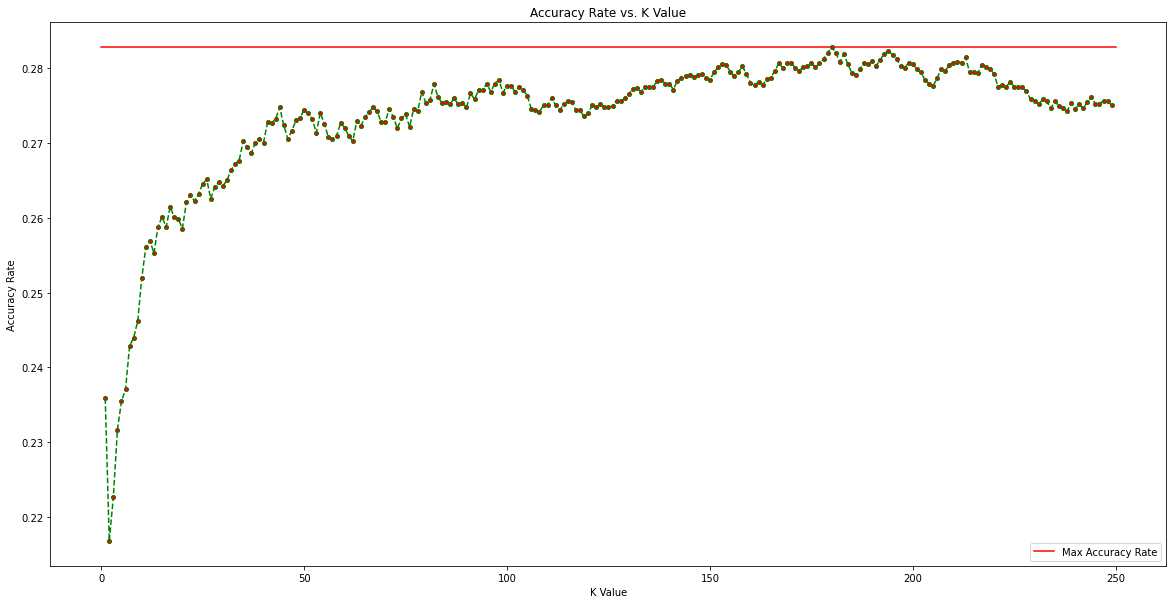

In [ ]:
#plot
plt.figure(figsize = (20,10))

x = np.linspace(0,250,100)
y = [max(Accuracy_rates) for i in range(100)]
plt.plot(x, y, '-r', label='Max Accuracy Rate')
plt.legend(loc='lower right')

plt.plot(range(1,250),Accuracy_rates,color='green', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=4)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy Rate')



In [ ]:
max_index = Accuracy_rates.index(max(Accuracy_rates)) #Best case identifier

k_nearest_neighbour = KNeighborsClassifier(n_neighbors=max_index)
k_nearest_neighbour.fit(one_train,two_train)
prediction = k_nearest_neighbour.predict(one_test)



print('For K=', max_index)
print('Confusion matrix: ')
print('\n')
print(confusion_matrix(two_test,prediction)) #confusion matrix
print('\n')
print('Accuracy rate: ',round(accuracy_score(two_test,prediction),2)*100,'%')
#accuracy rate


For K= 179
Confusion matrix: 


[[  5  25  57  17  11  55 100   3  46  10]
 [  0 225   6   1   1  10  51   0   2   1]
 [  6  13  82  20   6  26  46  11  48  12]
 [  1   2  55  68  27  12  50  15  56  17]
 [  2   0  27  60  24   3  37  55  89  12]
 [ 11  53  57   7   5  72  67   3  31  10]
 [  3  49  13  20  15  12 159   0   3  22]
 [  0   2  25  37  24   8   5  88 105  11]
 [  1   3  41  25   8   2  12  35 146   5]
 [  6  24  51  41  13  15  58  14  53  19]]


Accuracy rate:  30.0 %


In [ ]:
t=100

k_nearest_neighbour = KNeighborsClassifier(n_neighbors=t)
k_nearest_neighbour.fit(one_train,two_train)
prediction = k_nearest_neighbour.predict(one_test)



print('For K=', t)
print('Confusion matrix: ')
print('\n')
print(confusion_matrix(two_test,prediction)) #confusion matrix
print('\n')
print('Accuracy rate: ',round(accuracy_score(two_test,prediction),2)*100,'%')
#accuracy rate

For K= 100
Confusion matrix: 


[[ 11  24  52  19  18  60  89   4  42  10]
 [  4 219   6   0   1  13  51   0   2   1]
 [  8  12  81  22   5  28  43  11  47  13]
 [  6   2  49  65  32   8  47  16  56  22]
 [  1   0  26  58  34   3  31  56  86  14]
 [ 16  50  57   7   6  78  62   3  24  13]
 [  8  42  21  20  15  12 159   1   3  15]
 [  2   2  20  41  23  12   2  99  94  10]
 [  1   2  37  24   6   2  15  46 138   7]
 [  6  23  53  39  16  15  58  13  51  20]]


Accuracy rate:  30.0 %


In [ ]:
t=210

k_nearest_neighbour = KNeighborsClassifier(n_neighbors=t)
k_nearest_neighbour.fit(one_train,two_train)
prediction = k_nearest_neighbour.predict(one_test)



print('For K=', t)
print('Confusion matrix: ')
print('\n')
print(confusion_matrix(two_test,prediction)) #confusion matrix
print('\n')
print('Accuracy rate: ',round(accuracy_score(two_test,prediction),2)*100,'%')
#accuracy rate

For K= 210
Confusion matrix: 


[[  5  27  57  20  11  55  99   3  45   7]
 [  0 225   8   1   0   7  53   0   3   0]
 [  8  14  75  23   3  27  50  12  47  11]
 [  1   2  53  68  23  13  58  15  55  15]
 [  0   0  27  67  19   4  39  53  89  11]
 [ 12  55  56   7   5  71  68   3  30   9]
 [  2  51  17  19  11  12 162   0   3  19]
 [  0   2  27  41  24   6   6  87 103   9]
 [  1   1  39  28   7   2  17  34 145   4]
 [  8  25  52  47   9  14  61  11  54  13]]


Accuracy rate:  28.999999999999996 %


In [ ]:
scaled = MinMaxScaler() #function MinMax scaler for normalising values

In [ ]:
scaled.fit(data_set.drop('label',axis=1)) # dropping class feature

MinMaxScaler()

In [ ]:
dset_modified = scaled.transform(data_set.drop('label',axis=1))

In [ ]:
data_set_feat=pd.DataFrame(dset_modified,columns=data_set.columns[:-1])

In [ ]:
data_set_feat = np.round(data_set_feat, decimals=2)
data_set_feat.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.0,0.36,0.7,0.30,0.0,0.26,0.03,0.46,0.09,0.35,...,0.36,0.06,0.40,0.07,0.37,0.06,0.38,0.03,0.51,0.05
1,0.0,0.36,0.7,0.25,0.0,0.27,0.02,0.47,0.05,0.36,...,0.47,0.09,0.35,0.07,0.36,0.08,0.42,0.08,0.59,0.07
2,0.0,0.38,0.7,0.30,0.0,0.27,0.02,0.49,0.06,0.38,...,0.48,0.10,0.42,0.05,0.40,0.07,0.43,0.04,0.55,0.04
3,0.0,0.39,0.7,0.30,0.0,0.24,0.02,0.46,0.07,0.33,...,0.39,0.07,0.39,0.05,0.38,0.05,0.41,0.04,0.56,0.03
4,0.0,0.36,0.7,0.32,0.0,0.23,0.02,0.45,0.05,0.32,...,0.44,0.04,0.46,0.08,0.39,0.08,0.41,0.02,0.52,0.03


In [ ]:
one_train,one_test,two_train,two_test = train_test_split(data_set_feat,data_set['label'], test_size = 0.30)

In [ ]:
Accuracy_rates = []
a=[]

for i in range(1,250):
  k_nearest_neighbour = KNeighborsClassifier(n_neighbors = i)
  final_score = cross_val_score(k_nearest_neighbour, data_set_feat,data_set['label'], cv = 5)
  Accuracy_rates.append(final_score.mean())

In [ ]:
print(max(Accuracy_rates))
print(Accuracy_rates[1])
print(KNeighborsClassifier(n_neighbors = 3))
print(i)

0.4991991991991992
0.4806806806806806
KNeighborsClassifier(n_neighbors=3)
249


Text(0, 0.5, 'Accuracy Rate')

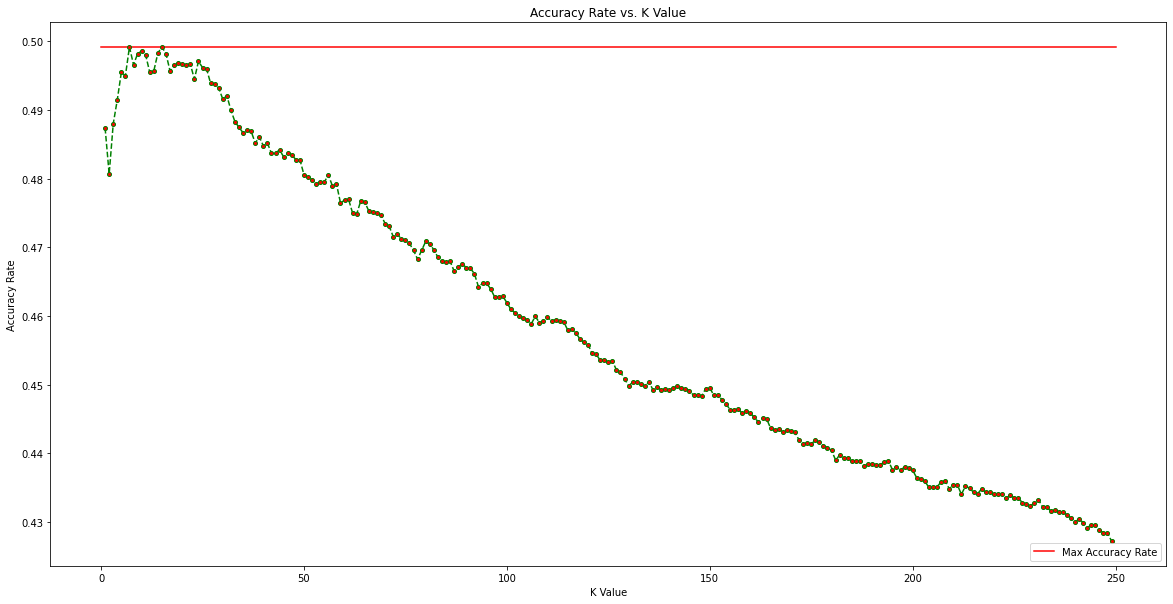

In [ ]:
plt.figure(figsize = (20,10))

x = np.linspace(0,250,100)
y = [max(Accuracy_rates) for i in range(100)]
plt.plot(x, y, '-r', label='Max Accuracy Rate')
plt.legend(loc='lower right')

plt.plot(range(1,250),Accuracy_rates,color='green', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=4)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy Rate')

In [ ]:
max_index = Accuracy_rates.index(max(Accuracy_rates)) #Best case identifier

k_nearest_neighbour = KNeighborsClassifier(n_neighbors=max_index)
k_nearest_neighbour = KNeighborsClassifier(n_neighbors=1)
k_nearest_neighbour.fit(one_train,two_train)
prediction = k_nearest_neighbour.predict(one_test)



print('For K=', max_index)
print('Confusion matrix: ')
print('\n')
print(confusion_matrix(two_test,prediction)) #confusion matrix
print('\n')
print('Accuracy rate: ',round(accuracy_score(two_test,prediction),2)*100,'%')
#accuracy rate

For K= 14
Confusion matrix: 


[[272   0   6   0   0   1   2   0   7   3]
 [  1 275   4   0   0  10   0   0   0   3]
 [  9   3 271   3   1   7   2   2   9  11]
 [  2   1   1 271   1   1   2   2   3   8]
 [  2   1   4   1 257   0   0   4   3   5]
 [  2  14   9   2   1 272   1   0   1   2]
 [  4   0   1   2   0   0 300   0   1   8]
 [  0   0   6   9   1   1   0 275   6   9]
 [  1   0   7   0  10   1   0   4 276   3]
 [  4   2   4  14   4   6   2   4   2 255]]


Accuracy rate:  91.0 %
